# Laboratorio di simulazione numerica

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import string

### Exercise 04.4

The following plots show the results of the simulation, with the code developed in this exercise, of some physical systems at equilibrium.
To obtain the data, run `./exercise04 phase` while in the `exercise04` directory; `phase` may be one of `gaseous`, `liquid` or `solid` according to the phase of the system you wish to simulate. To run everything at once, launch `./run_all.sh`.

For each system, the simulation is run a first time (without doing any measurement) in order to reach an equilibrium state; then, with the same parameters, another simulation is run from which the physical quantities are extracted.

Here are the parameters characterizing each of the three different phases: they are expressed in reduced units, therefore they hold for both argon and krypton systems.
<table>
    <tr>
        <th style="text-align: center">Gaseous phase</th>
        <th style="text-align: center">Liquid phase</th>
        <th style="text-align: center">Solid phase</th>
    </tr>
    <tr>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>Particle density</td><td>0.05</td>
            </tr>
            <tr>
                <td>Temperature</td><td>1.2</td>
            </tr>
            <tr>
                <td>Cut-off radius</td><td>5.0</td>
            </tr>
        </table></td>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>Particle density</td><td>0.8</td>
            </tr>
            <tr>
                <td>Temperature</td><td>1.1</td>
            </tr>
            <tr>
                <td>Cut-off radius</td><td>2.5</td>
            </tr>
            </table></td>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>Particle density</td><td>1.1</td>
            </tr>
            <tr>
                <td>Temperature</td><td>0.8</td>
            </tr>
            <tr>
                <td>Cut-off radius</td><td>2.2</td>
            </tr>
            </table></td>
    </tr>
</table>

These are the parameters specific to each element.
<table>
    <tr>
        <th style="text-align: center">Argon</th>
        <th style="text-align: center">Krypton</th>
    </tr>
    <tr>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>$\sigma$</td><td>0.34 nm</td>
            </tr>
            <tr>
                <td>$\epsilon/k_\text{B}$</td><td>120 K</td>
            </tr>
            <tr>
                <td>m</td><td>39.948 a.m.u.</td>
            </tr>
        </table></td>
        <td><table>
            <tr>
                <th>Quantity</th><th>Value</th>
            </tr>
            <tr>
                <td>$\sigma$</td><td>0.364 nm</td>
            </tr>
            <tr>
                <td>$\epsilon/k_\text{B}$</td><td>164 K</td>
            </tr>
            <tr>
                <td>m</td><td>83.798 a.m.u.</td>
            </tr>
        </table></td>
    </tr>
</table>

In [2]:
# Physical constants in SI units (arbitrarily approximated...)
boltzmann_constant = 1.381e-23
atomic_mass_unit = 1.661e-27

# Utilities
elements = ["argon", "krypton"]
phases = ["gaseous", "liquid", "solid"]
integration_step = 0.0005

# Unit scales
length      = {"argon" : 0.34e-9,                   "krypton" : 0.364e-9}
energy      = {"argon" : 120 * boltzmann_constant,  "krypton" : 164 * boltzmann_constant}
mass        = {"argon" : 39.948 * atomic_mass_unit, "krypton" : 83.798 * atomic_mass_unit}

###### Potential energy per particle

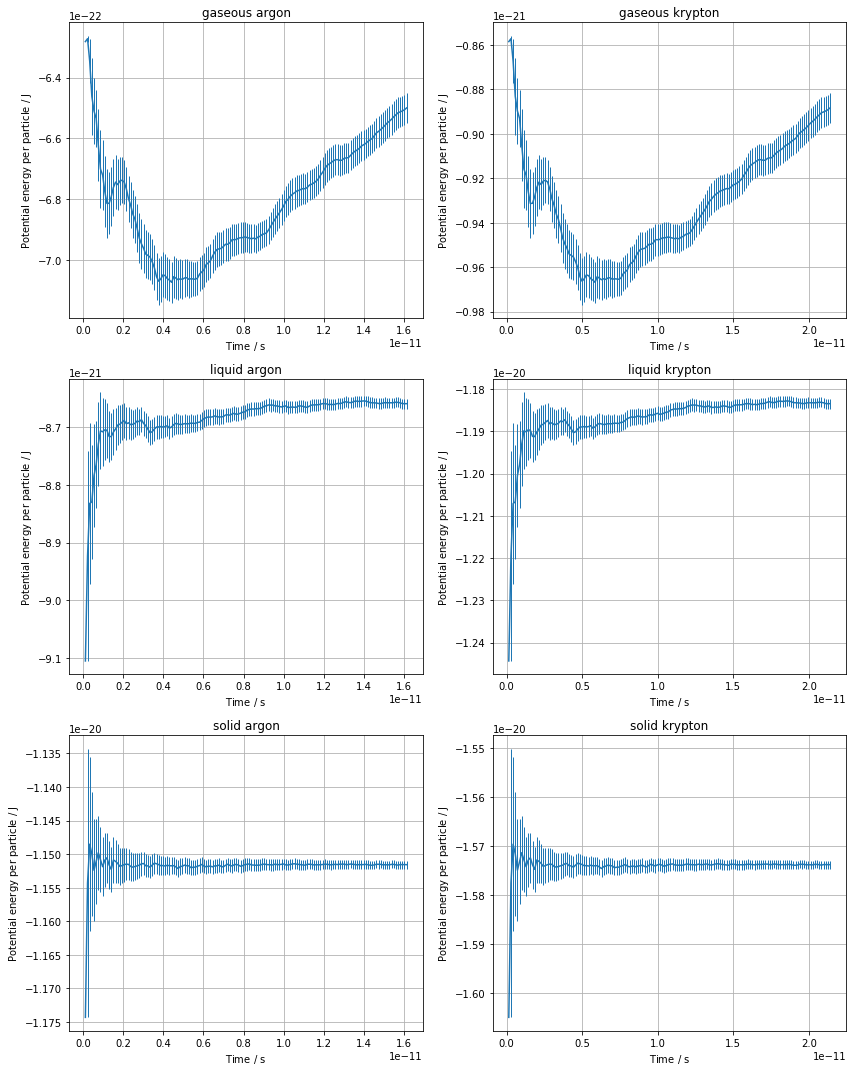

In [3]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (2 * 6, 3 * 5))
axes = axes.flatten()
filename = "pot_energy"

for (p_count, phase) in enumerate(phases):
    for (e_count, element) in enumerate(elements):
        SI_unit = energy[element]
        time = np.sqrt(mass[element] * length[element]**2 / energy[element])
        axes[2 * p_count + e_count].set_title(phase + " " + element)
        axes[2 * p_count + e_count].set_xlabel(r"Time / $\mathrm{s}$")
        axes[2 * p_count + e_count].set_ylabel(r"Potential energy per particle / $\mathrm{J}$")
        steps, u_avg, u_err = np.loadtxt(
            phase + "/" + filename + ".dat",
            unpack = True,
            skiprows = 1
        )
        axes[2 * p_count + e_count].errorbar(
            time * integration_step * steps,
            u_avg * SI_unit,
            yerr = u_err * SI_unit,
            elinewidth = 1,
        )
        axes[2 * p_count + e_count].grid(True)

fig.tight_layout()
plt.show()

###### Kinetic energy per particle

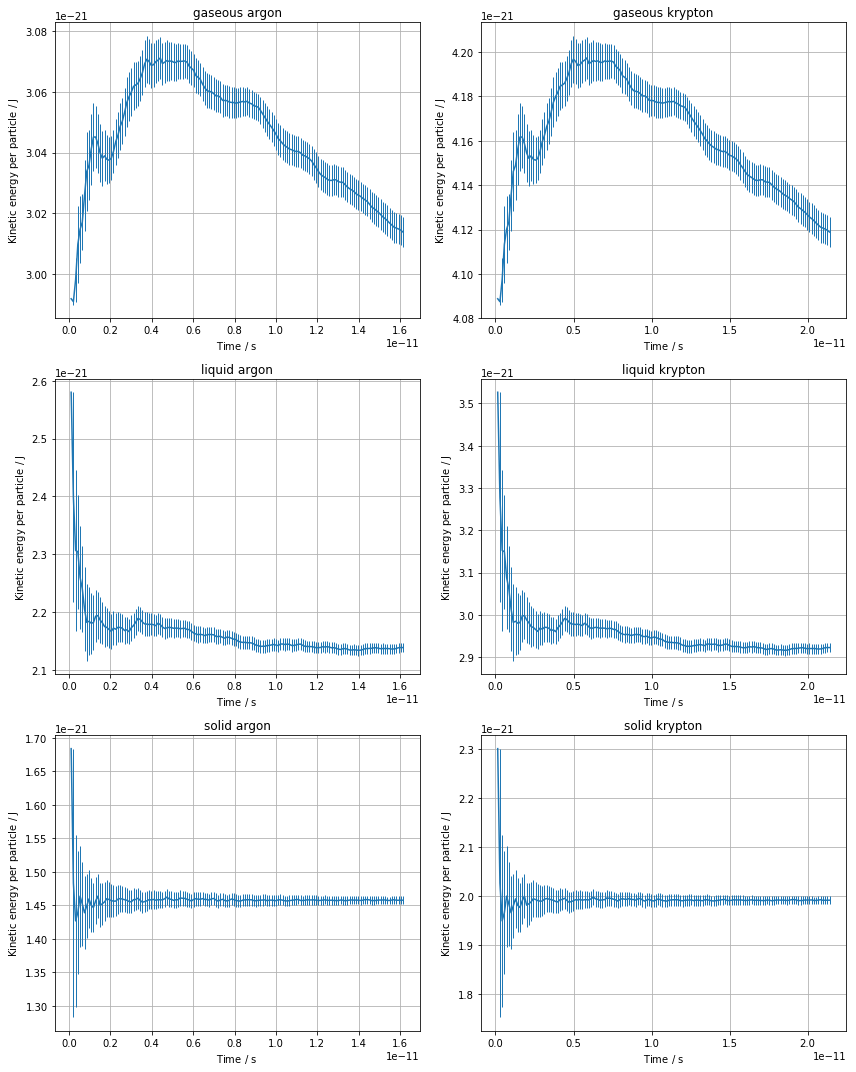

In [4]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (2 * 6, 3 * 5))
axes = axes.flatten()
filename = "kin_energy"

for (p_count, phase) in enumerate(phases):
    for (e_count, element) in enumerate(elements):
        SI_unit = energy[element]
        time = np.sqrt(mass[element] * length[element]**2 / energy[element])
        axes[2 * p_count + e_count].set_title(phase + " " + element)
        axes[2 * p_count + e_count].set_xlabel(r"Time / $\mathrm{s}$")
        axes[2 * p_count + e_count].set_ylabel(r"Kinetic energy per particle / $\mathrm{J}$")
        steps, u_avg, u_err = np.loadtxt(
            phase + "/" + filename + ".dat",
            unpack = True,
            skiprows = 1
        )
        axes[2 * p_count + e_count].errorbar(
            time * integration_step * steps,
            u_avg * SI_unit,
            yerr = u_err * SI_unit,
            elinewidth = 1,
        )
        axes[2 * p_count + e_count].grid(True)

fig.tight_layout()
plt.show()

###### Total energy per particle

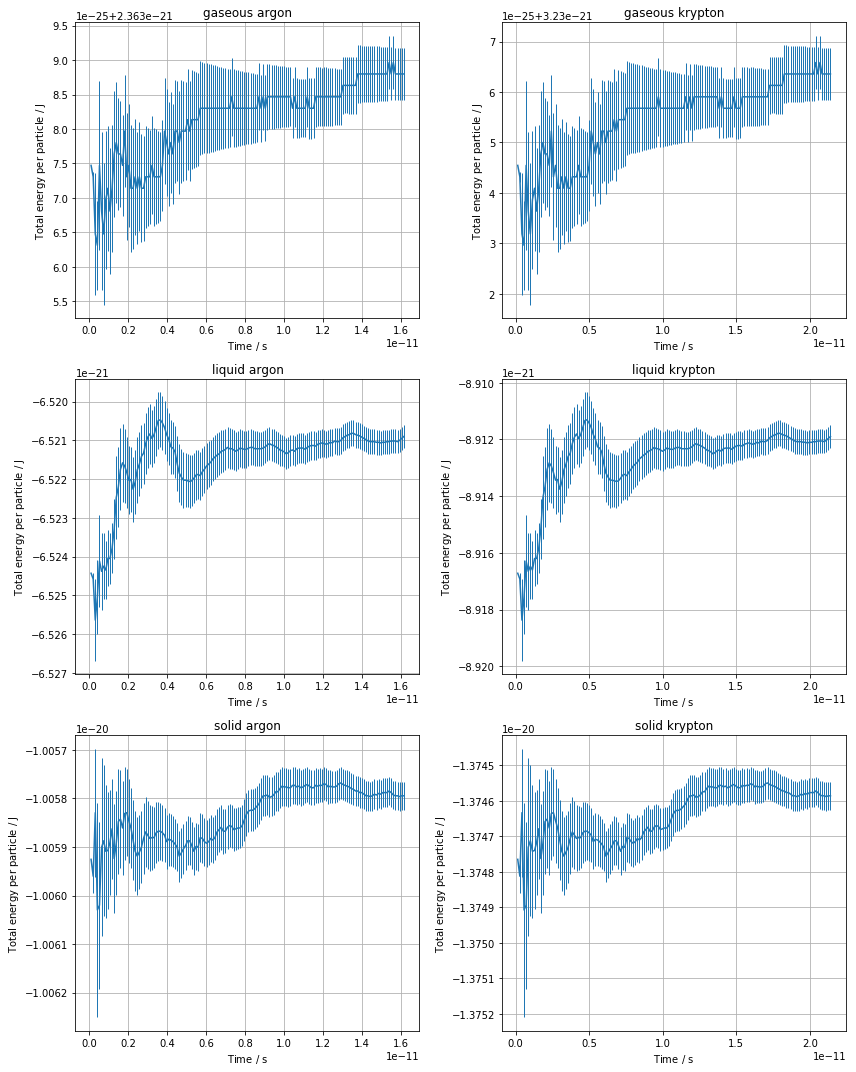

In [5]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (2 * 6, 3 * 5))
axes = axes.flatten()
filename = "tot_energy"

for (p_count, phase) in enumerate(phases):
    for (e_count, element) in enumerate(elements):
        SI_unit = energy[element]
        time = np.sqrt(mass[element] * length[element]**2 / energy[element])
        axes[2 * p_count + e_count].set_title(phase + " " + element)
        axes[2 * p_count + e_count].set_xlabel(r"Time / $\mathrm{s}$")
        axes[2 * p_count + e_count].set_ylabel(r"Total energy per particle / $\mathrm{J}$")
        steps, u_avg, u_err = np.loadtxt(
            phase + "/" + filename + ".dat",
            unpack = True,
            skiprows = 1
        )
        axes[2 * p_count + e_count].errorbar(
            time * integration_step * steps,
            u_avg * SI_unit,
            yerr = u_err * SI_unit,
            elinewidth = 1,
        )
        axes[2 * p_count + e_count].grid(True)

fig.tight_layout()
plt.show()

###### All three energy plots together
From the plots above it would seem that the total energy $E$ (which should be conserved!) fluctuates in a strange way.
However we can see that the fluctuations occur on the fourth, or possibly the fifth, significant digit, and in fact, if we plot the total energy together with the potential $U$ and kinetic energy $T$, we see that with respect to the fluctuations of $U$ and $K$ those of $E$ are really negligible.
It would seem, after all, that the total energy is really (approximately, of course) conserved.
The plots below also show how the variations of $U$ and $T$ oppose each other.

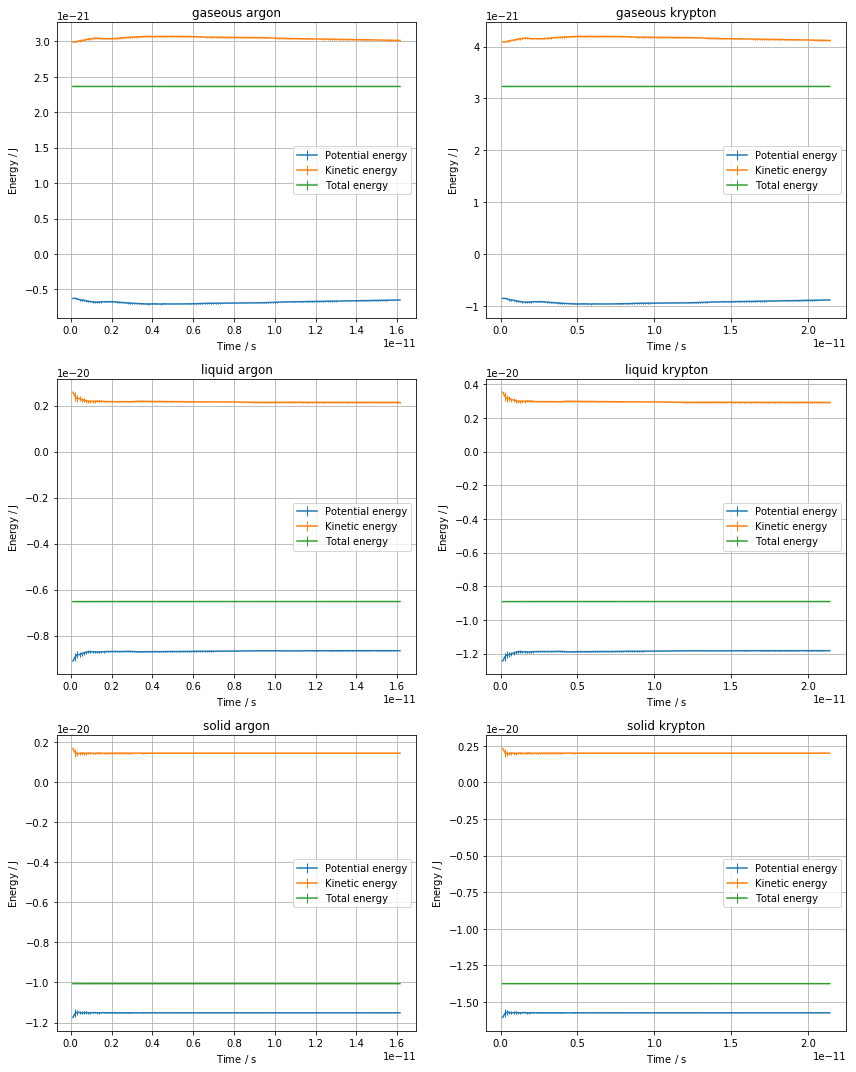

In [6]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (2 * 6, 3 * 5))
axes = axes.flatten()

for (p_count, phase) in enumerate(phases):
    for (e_count, element) in enumerate(elements):
        SI_unit = energy[element]
        time = np.sqrt(mass[element] * length[element]**2 / energy[element])
        axes[2 * p_count + e_count].set_title(phase + " " + element)
        axes[2 * p_count + e_count].set_xlabel(r"Time / $\mathrm{s}$")
        axes[2 * p_count + e_count].set_ylabel(r"Energy / $\mathrm{J}$")
        steps, u_avg, u_err = np.loadtxt(
            phase + "/pot_energy.dat",
            unpack = True,
            skiprows = 1
        )
        axes[2 * p_count + e_count].errorbar(
            time * integration_step * steps,
            u_avg * SI_unit,
            yerr = u_err * SI_unit,
            elinewidth = 1,
            label = "Potential energy"
        )
        steps, u_avg, u_err = np.loadtxt(
            phase + "/kin_energy.dat",
            unpack = True,
            skiprows = 1
        )
        axes[2 * p_count + e_count].errorbar(
            time * integration_step * steps,
            u_avg * SI_unit,
            yerr = u_err * SI_unit,
            elinewidth = 1,
            label = "Kinetic energy"
        )
        steps, u_avg, u_err = np.loadtxt(
            phase + "/tot_energy.dat",
            unpack = True,
            skiprows = 1
        )
        axes[2 * p_count + e_count].errorbar(
            time * integration_step * steps,
            u_avg * SI_unit,
            yerr = u_err * SI_unit,
            elinewidth = 1,
            label = "Total energy"
        )
        axes[2 * p_count + e_count].grid(True)
        axes[2 * p_count + e_count].legend()

fig.tight_layout()
plt.show()

###### Temperature

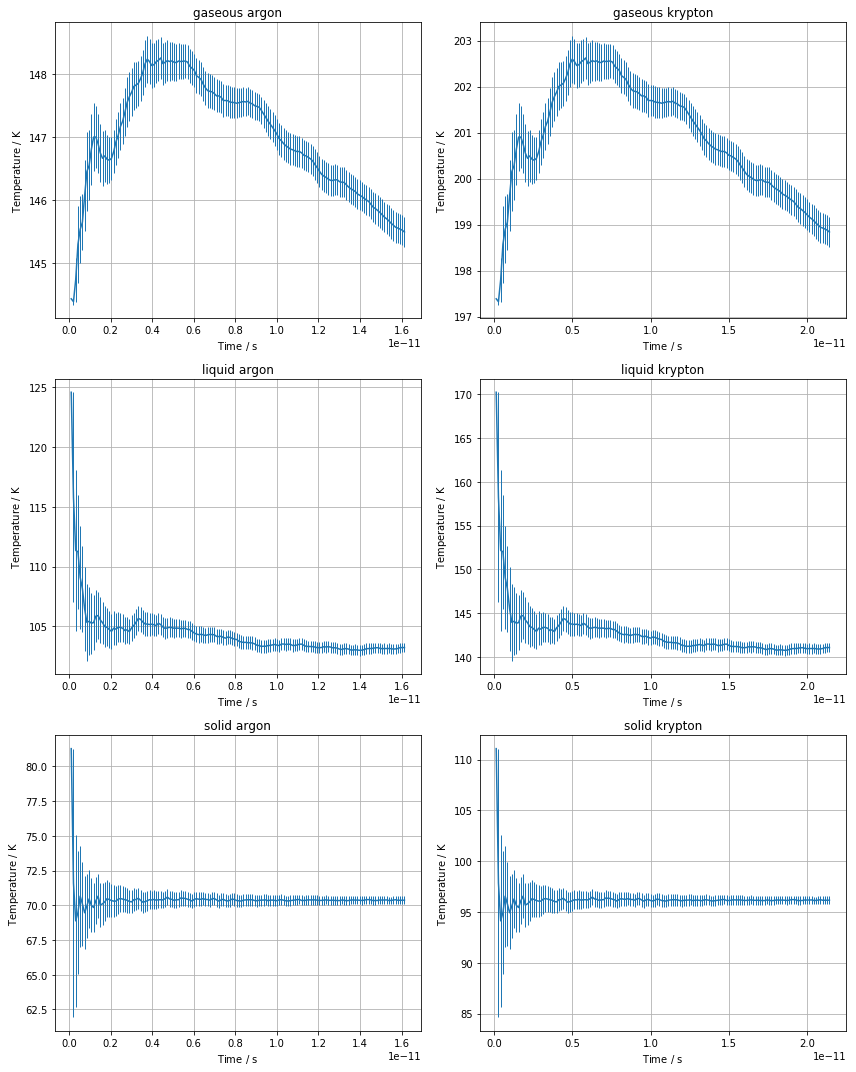

In [7]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (2 * 6, 3 * 5))
axes = axes.flatten()
filename = "temperature"

for (p_count, phase) in enumerate(phases):
    for (e_count, element) in enumerate(elements):
        SI_unit = energy[element] / boltzmann_constant
        time = np.sqrt(mass[element] * length[element]**2 / energy[element])
        axes[2 * p_count + e_count].set_title(phase + " " + element)
        axes[2 * p_count + e_count].set_xlabel(r"Time / $\mathrm{s}$")
        axes[2 * p_count + e_count].set_ylabel(r"Temperature / $\mathrm{K}$")
        steps, u_avg, u_err = np.loadtxt(
            phase + "/" + filename + ".dat",
            unpack = True,
            skiprows = 1
        )
        axes[2 * p_count + e_count].errorbar(
            time * integration_step * steps,
            u_avg * SI_unit,
            yerr = u_err * SI_unit,
            elinewidth = 1,
        )
        axes[2 * p_count + e_count].grid(True)

fig.tight_layout()
plt.show()

###### Pressure

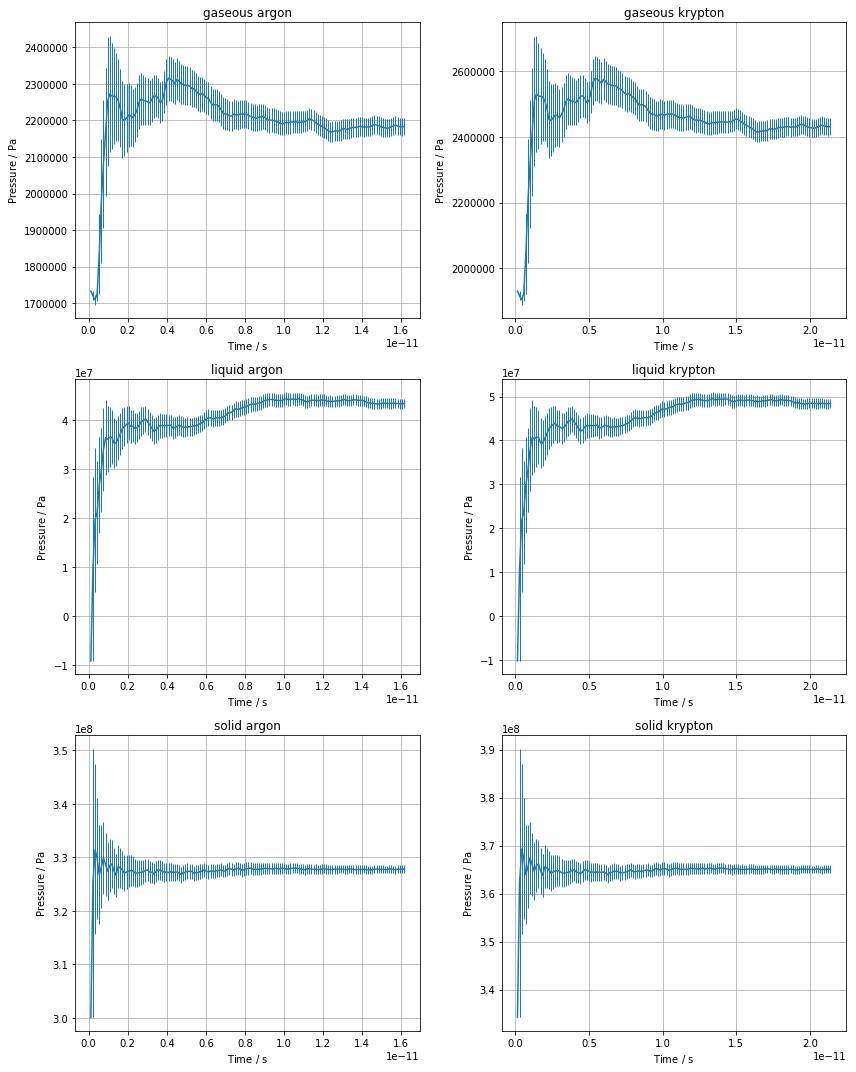

In [8]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (2 * 6, 3 * 5))
axes = axes.flatten()
filename = "pressure"

for (p_count, phase) in enumerate(phases):
    for (e_count, element) in enumerate(elements):
        SI_unit = energy[element] * length[element]**(-3)
        time = np.sqrt(mass[element] * length[element]**2 / energy[element])
        axes[2 * p_count + e_count].set_title(phase + " " + element)
        axes[2 * p_count + e_count].set_xlabel(r"Time / $\mathrm{s}$")
        axes[2 * p_count + e_count].set_ylabel(r"Pressure / $\mathrm{Pa}$")
        steps, u_avg, u_err = np.loadtxt(
            phase + "/" + filename + ".dat",
            unpack = True,
            skiprows = 1
        )
        axes[2 * p_count + e_count].errorbar(
            time * integration_step * steps,
            u_avg * SI_unit,
            yerr = u_err * SI_unit,
            elinewidth = 1,
        )
        axes[2 * p_count + e_count].grid(True)

fig.tight_layout()
plt.show()